In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiment_design = {
    1: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    2: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    3: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    4: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    5: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    6: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    7: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    8: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'},
    9: {'IDE-A': 'Prog-1', 'IDE-B': 'Prog-2'},
    10: {'IDE-A': 'Prog-2', 'IDE-B': 'Prog-1'}
}

In [3]:
time_data = {
    1: {'Prog-1': 104, 'Prog-2': 71.3},
    2: {'Prog-1': 102, 'Prog-2': 110},
    3: {'Prog-1': 159, 'Prog-2': 178},
    4: {'Prog-1': 168, 'Prog-2': 153},
    5: {'Prog-1': 150, 'Prog-2': 120},
    6: {'Prog-1': 151, 'Prog-2': 174},
    7: {'Prog-1': 111, 'Prog-2': 94.9},
    8: {'Prog-1': 105, 'Prog-2': 86.1},
    9: {'Prog-1': 137, 'Prog-2': 115},
    10: {'Prog-1': 124, 'Prog-2': 175}
}

In [4]:
# Extract Prog-1 and Prog-2 times
prog1_times = [time_data[prog]['Prog-1'] for prog in time_data]
prog2_times = [time_data[prog]['Prog-2'] for prog in time_data]

# 1. Summary Statistics
prog1_mean = np.mean(prog1_times)
prog2_mean = np.mean(prog2_times)
prog1_std = np.std(prog1_times)
prog2_std = np.std(prog2_times)

print(f"Prog-1: Mean = {prog1_mean:.2f}, Std Dev = {prog1_std:.2f}")
print(f"Prog-2: Mean = {prog2_mean:.2f}, Std Dev = {prog2_std:.2f}")

Prog-1: Mean = 131.10, Std Dev = 23.76
Prog-2: Mean = 127.73, Std Dev = 37.51


In [5]:
# Calculate the difference between Prog-1 and Prog-2
time_diffs = [prog1_times[i] - prog2_times[i] for i in range(len(prog1_times))]

time_diff_mean = np.mean(time_diffs)
time_diff_std = np.std(time_diffs)

print(f"Time diff Prog-1/Prog-2: Mean = {time_diff_mean:.2f}, Std Dev = {time_diff_std:.2f}")

Time diff Prog-1/Prog-2: Mean = 3.37, Std Dev = 25.95


The mean difference between Prog-1 and Prog-2 is small (3.37 minutes), and the standard deviation (25.95) is large relative to the mean, suggesting that there might not be a large, consistent difference between the two programs. However, a formal statistical test, such as a paired t-test, is needed to confirm whether this difference is statistically significant.

#### Why a Statistical Test is Needed:
- The fact that the mean difference is small and the standard deviation is large does suggest that the performance times for Prog-1 and Prog-2 may not be significantly different.
- But to confirm this, a t-test would compare the means and provide a p-value to indicate whether the observed difference could have happened by chance.

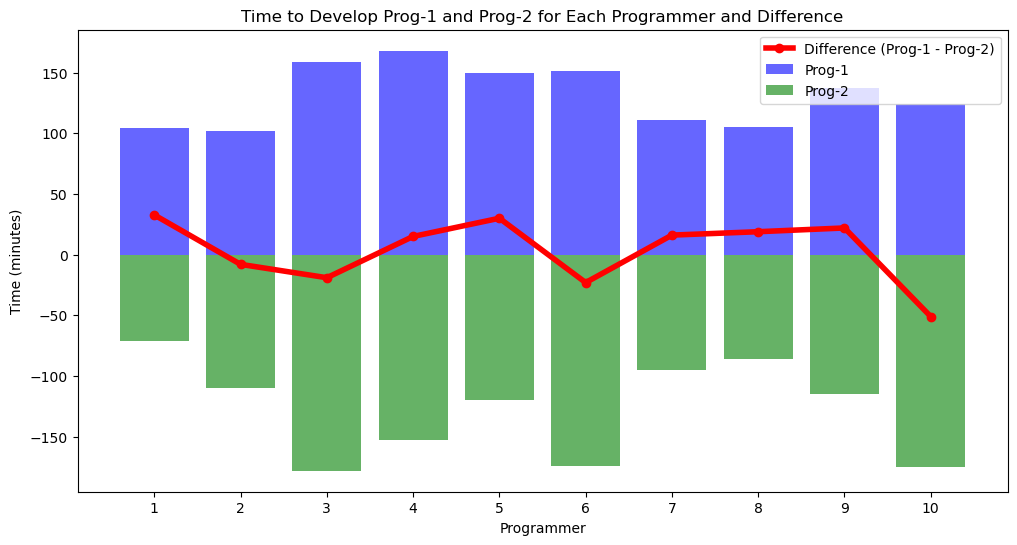

In [6]:
# 2. Visualization: Prog-1 in positive direction, Prog-2 in negative, and the difference as a line graph
plt.figure(figsize=(12, 6))

# Plot Prog-1 in the positive direction
plt.bar(time_data.keys(), prog1_times, label='Prog-1', color='blue', alpha=0.6)

# Plot Prog-2 in the negative direction
plt.bar(time_data.keys(), [-t for t in prog2_times], label='Prog-2', color='green', alpha=0.6)

# Plot the difference between Prog-1 and Prog-2 as a line graph
plt.plot(time_data.keys(), time_diffs, label='Difference (Prog-1 - Prog-2)', color='red', marker='o', linewidth=4)

# Add labels and title
plt.xlabel('Programmer')
plt.ylabel('Time (minutes)')
plt.title('Time to Develop Prog-1 and Prog-2 for Each Programmer and Difference')

# Ensure x-axis shows programmer numbers from 1 to 10
plt.xticks(list(time_data.keys()), [str(prog) for prog in time_data.keys()])

plt.legend()
plt.show()


In [8]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_stat, p_value = ttest_rel(prog1_times, prog2_times)

print(f"Paired t-test p-value: {p_value:.4f}")

Paired t-test p-value: 0.7059


A high p-value suggests that there is a high probability that the difference in dev times between prog-1 and prog-2 can come from random chance, meaning we can not reject the null hypothesis that the two programs have the same development time. 

IDE-A: Mean = 134.41, Std Dev = 30.93
IDE-B: Mean = 124.42, Std Dev = 31.16
Time diff IDE-A/IDE-B: Mean = 9.99, Std Dev = 24.19


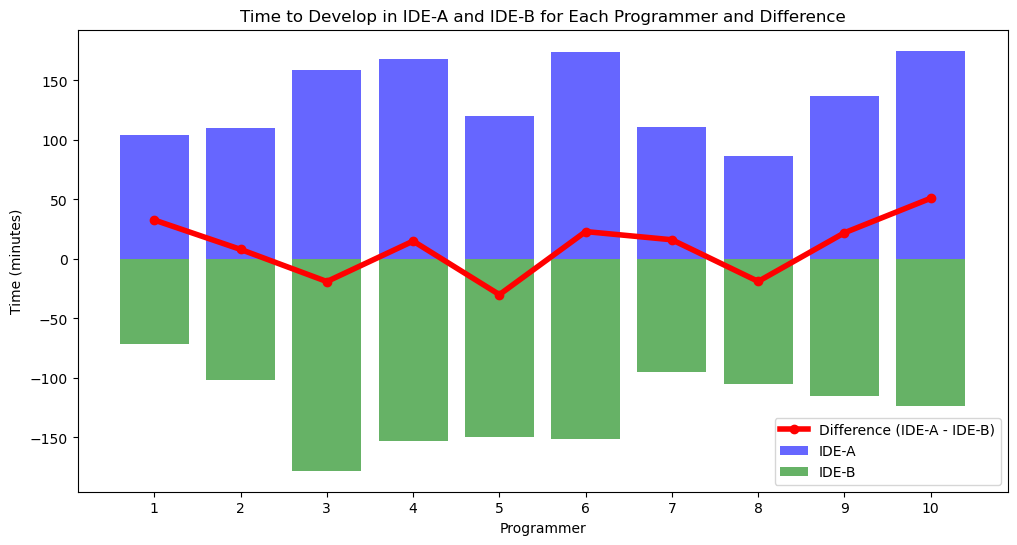

Paired t-test p-value: 0.2467


In [9]:
# Extract IDE-A and IDE-B times
ide_a_times = [time_data[prog][experiment_design[prog]['IDE-A']] for prog in time_data]
ide_b_times = [time_data[prog][experiment_design[prog]['IDE-B']] for prog in time_data]

# 1. Summary Statistics
ide_a_mean = np.mean(ide_a_times)
ide_b_mean = np.mean(ide_b_times)
ide_a_std = np.std(ide_a_times)
ide_b_std = np.std(ide_b_times)

print(f"IDE-A: Mean = {ide_a_mean:.2f}, Std Dev = {ide_a_std:.2f}")
print(f"IDE-B: Mean = {ide_b_mean:.2f}, Std Dev = {ide_b_std:.2f}")

# Calculate the difference between IDE-A and IDE-B
ide_diffs = [ide_a_times[i] - ide_b_times[i] for i in range(len(ide_a_times))]

ide_diff_mean = np.mean(ide_diffs)
ide_diff_std = np.std(ide_diffs)

print(f"Time diff IDE-A/IDE-B: Mean = {ide_diff_mean:.2f}, Std Dev = {ide_diff_std:.2f}")

# 2. Visualization: IDE-A in positive direction, IDE-B in negative, and the difference as a line graph
plt.figure(figsize=(12, 6))

# Plot IDE-A in the positive direction
plt.bar(time_data.keys(), ide_a_times, label='IDE-A', color='blue', alpha=0.6)

# Plot IDE-B in the negative direction
plt.bar(time_data.keys(), [-t for t in ide_b_times], label='IDE-B', color='green', alpha=0.6)

# Plot the difference between IDE-A and IDE-B as a line graph
plt.plot(time_data.keys(), ide_diffs, label='Difference (IDE-A - IDE-B)', color='red', marker='o', linewidth=4)

# Add labels and title
plt.xlabel('Programmer')
plt.ylabel('Time (minutes)')
plt.title('Time to Develop in IDE-A and IDE-B for Each Programmer and Difference')

# Ensure x-axis shows programmer numbers from 1 to 10
plt.xticks(list(time_data.keys()), [str(prog) for prog in time_data.keys()])

plt.legend()
plt.show()

# Perform paired t-test
t_stat, p_value = ttest_rel(ide_a_times, ide_b_times)

print(f"Paired t-test p-value: {p_value:.4f}")

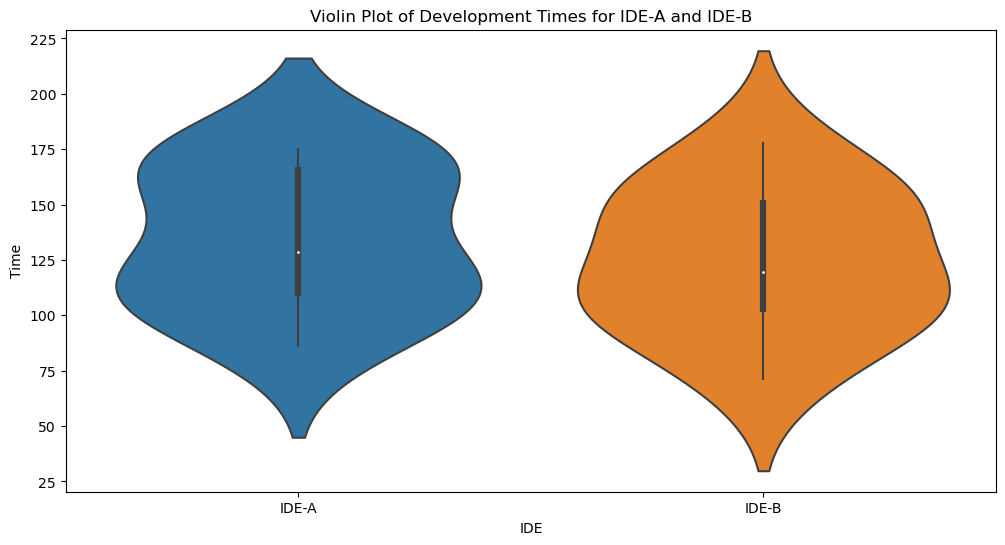

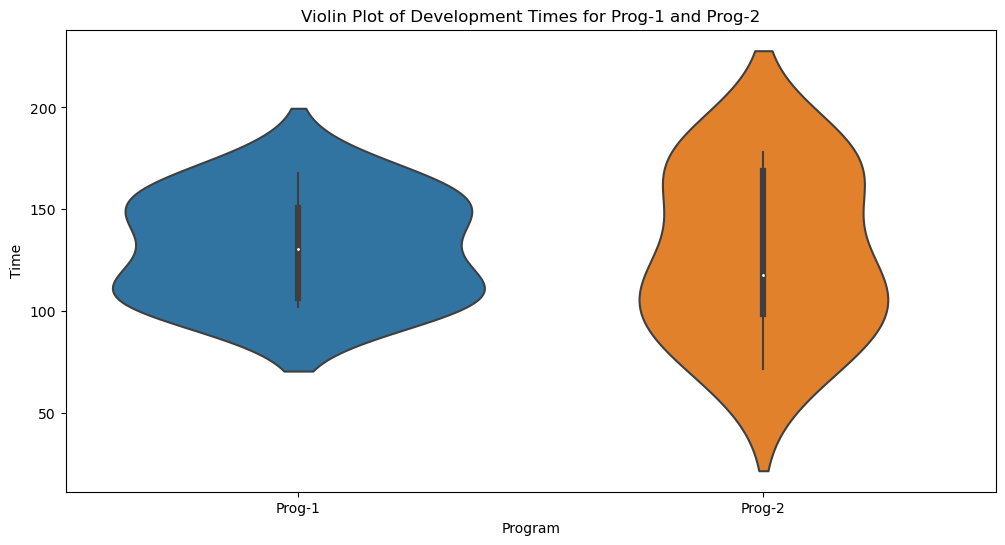

In [10]:
import seaborn as sns
import pandas as pd

# Prepare data for IDE-A and IDE-B
ide_data = pd.DataFrame({
    'Time': ide_a_times + ide_b_times,
    'IDE': ['IDE-A'] * len(ide_a_times) + ['IDE-B'] * len(ide_b_times)
})

# Prepare data for Prog-1 and Prog-2
prog_data = pd.DataFrame({
    'Time': prog1_times + prog2_times,
    'Program': ['Prog-1'] * len(prog1_times) + ['Prog-2'] * len(prog2_times)
})

# Create violin plot for IDE-A and IDE-B
plt.figure(figsize=(12, 6))
sns.violinplot(x='IDE', y='Time', data=ide_data)
plt.title('Violin Plot of Development Times for IDE-A and IDE-B')
plt.show()

# Create violin plot for Prog-1 and Prog-2
plt.figure(figsize=(12, 6))
sns.violinplot(x='Program', y='Time', data=prog_data)
plt.title('Violin Plot of Development Times for Prog-1 and Prog-2')
plt.show()

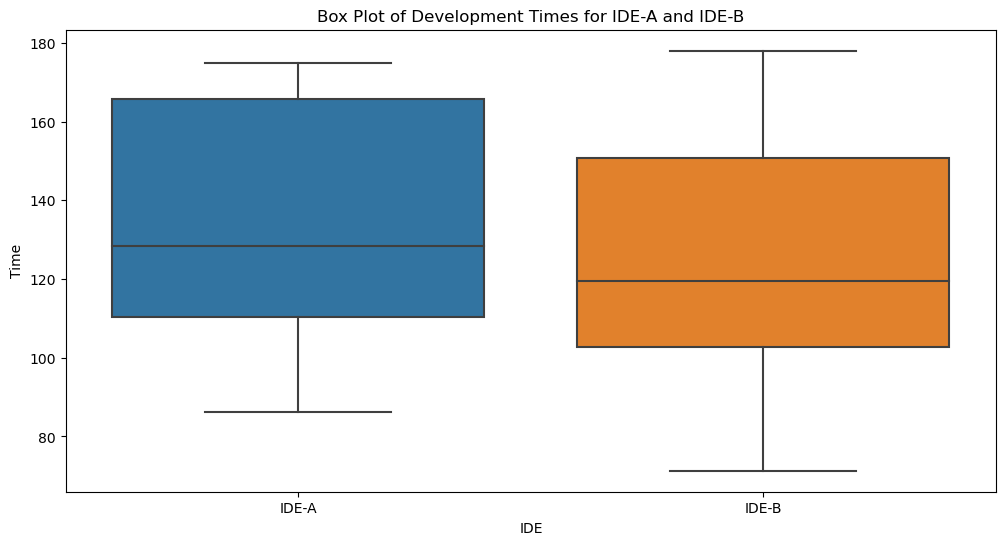

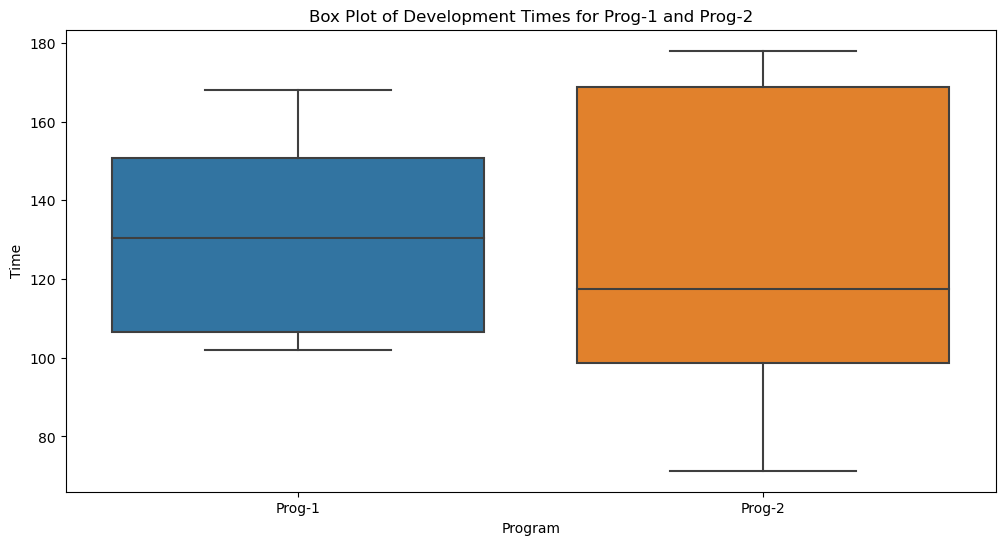

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for IDE-A and IDE-B
ide_data = pd.DataFrame({
    'Time': ide_a_times + ide_b_times,
    'IDE': ['IDE-A'] * len(ide_a_times) + ['IDE-B'] * len(ide_b_times)
})

# Prepare data for Prog-1 and Prog-2
prog_data = pd.DataFrame({
    'Time': prog1_times + prog2_times,
    'Program': ['Prog-1'] * len(prog1_times) + ['Prog-2'] * len(prog2_times)
})

# Create box plot for IDE-A and IDE-B with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='IDE', y='Time', data=ide_data, showfliers=True)
plt.title('Box Plot of Development Times for IDE-A and IDE-B')
plt.show()

# Create box plot for Prog-1 and Prog-2 with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Program', y='Time', data=prog_data, showfliers=True)
plt.title('Box Plot of Development Times for Prog-1 and Prog-2')
plt.show()

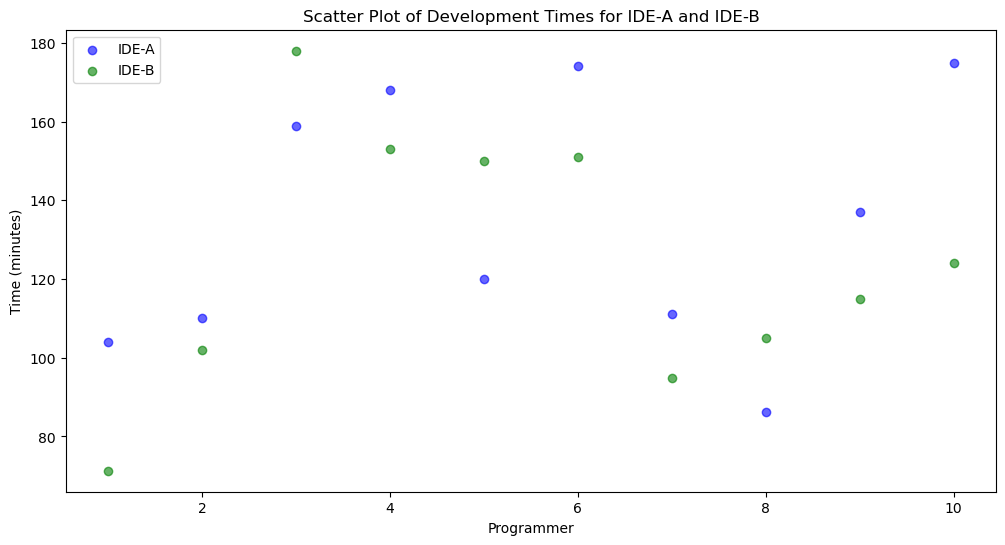

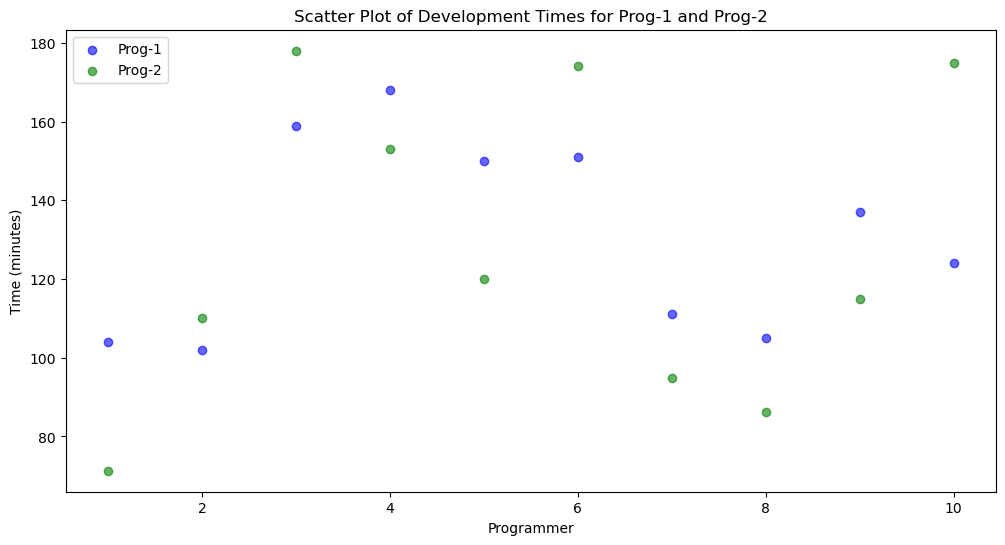

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for IDE-A and IDE-B
plt.figure(figsize=(12, 6))
plt.scatter(time_data.keys(), ide_a_times, label='IDE-A', color='blue', alpha=0.6)
plt.scatter(time_data.keys(), ide_b_times, label='IDE-B', color='green', alpha=0.6)
plt.xlabel('Programmer')
plt.ylabel('Time (minutes)')
plt.title('Scatter Plot of Development Times for IDE-A and IDE-B')
plt.legend()
plt.show()

# Scatter plot for Prog-1 and Prog-2
plt.figure(figsize=(12, 6))
plt.scatter(time_data.keys(), prog1_times, label='Prog-1', color='blue', alpha=0.6)
plt.scatter(time_data.keys(), prog2_times, label='Prog-2', color='green', alpha=0.6)
plt.xlabel('Programmer')
plt.ylabel('Time (minutes)')
plt.title('Scatter Plot of Development Times for Prog-1 and Prog-2')
plt.legend()
plt.show()

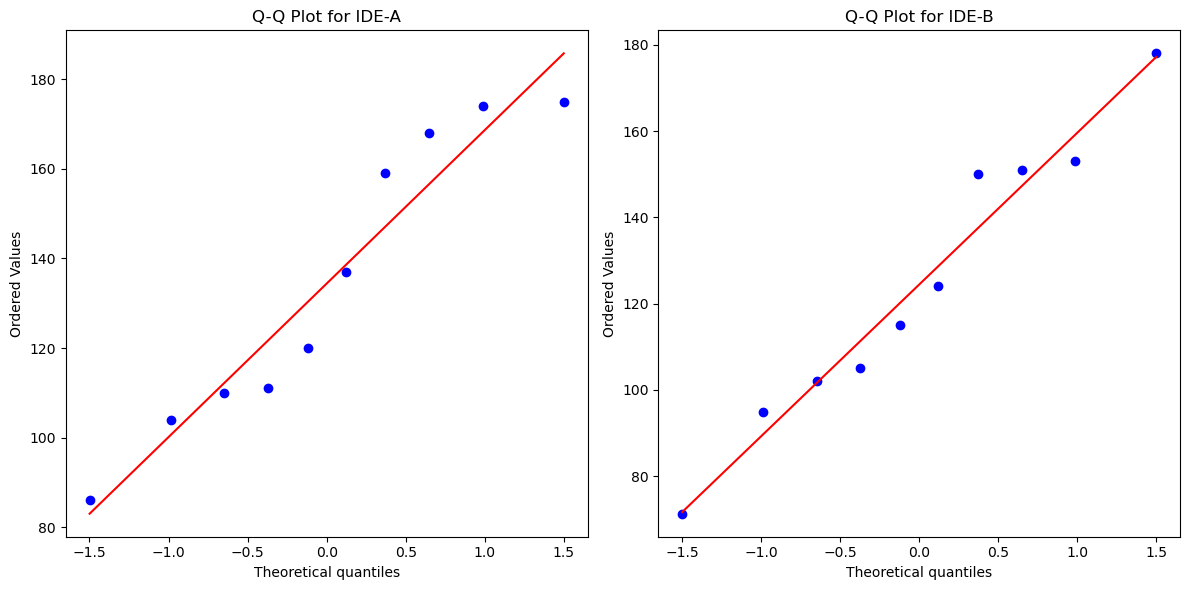

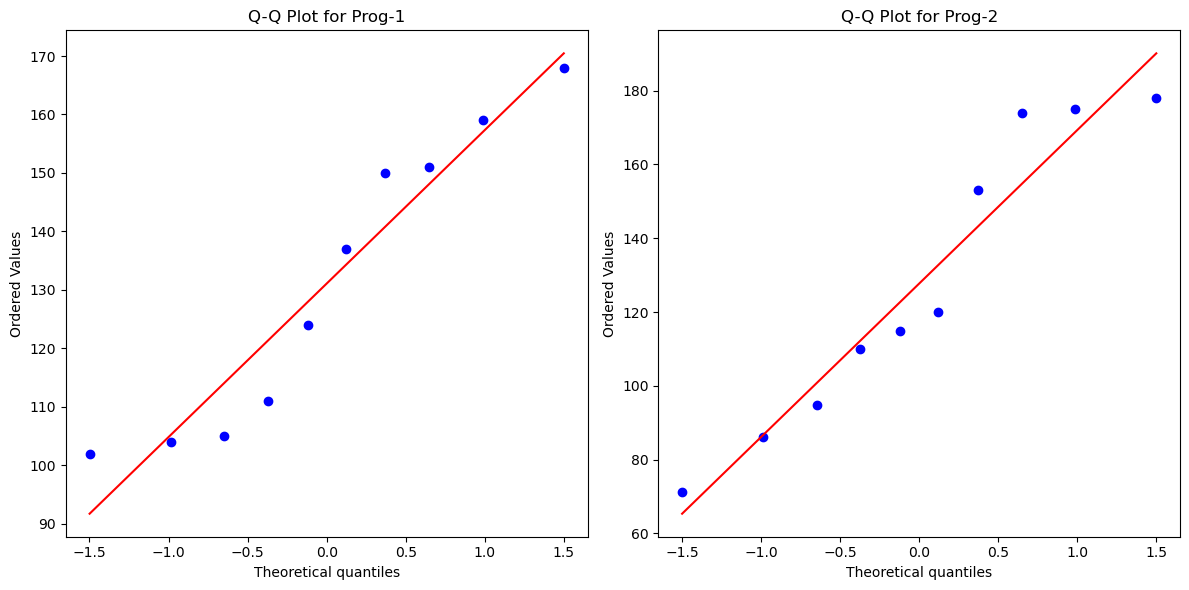

In [22]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plots for IDE-A and IDE-B
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(ide_a_times, dist="norm", plot=plt)
plt.title('Q-Q Plot for IDE-A')

plt.subplot(1, 2, 2)
stats.probplot(ide_b_times, dist="norm", plot=plt)
plt.title('Q-Q Plot for IDE-B')

plt.tight_layout()
plt.show()

# Q-Q plots for Prog-1 and Prog-2
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(prog1_times, dist="norm", plot=plt)
plt.title('Q-Q Plot for Prog-1')

plt.subplot(1, 2, 2)
stats.probplot(prog2_times, dist="norm", plot=plt)
plt.title('Q-Q Plot for Prog-2')

plt.tight_layout()
plt.show()

In [15]:
# Extract times for Prog-1 and Prog-2 with IDE-A and IDE-B
prog1_ide_a_times = [time_data[prog]['Prog-1'] for prog in time_data if experiment_design[prog]['IDE-A'] == 'Prog-1']
prog1_ide_b_times = [time_data[prog]['Prog-1'] for prog in time_data if experiment_design[prog]['IDE-B'] == 'Prog-1']
prog2_ide_a_times = [time_data[prog]['Prog-2'] for prog in time_data if experiment_design[prog]['IDE-A'] == 'Prog-2']
prog2_ide_b_times = [time_data[prog]['Prog-2'] for prog in time_data if experiment_design[prog]['IDE-B'] == 'Prog-2']

In [16]:
from scipy.stats import ttest_rel

# Perform paired t-tests
t_stat_prog1, p_value_prog1 = ttest_rel(prog1_ide_a_times, prog1_ide_b_times)
t_stat_prog2, p_value_prog2 = ttest_rel(prog2_ide_a_times, prog2_ide_b_times)

print(f"Paired t-test p-value for Prog-1: {p_value_prog1:.4f}")
print(f"Paired t-test p-value for Prog-2: {p_value_prog2:.4f}")

Paired t-test p-value for Prog-1: 0.0230
Paired t-test p-value for Prog-2: 0.6333


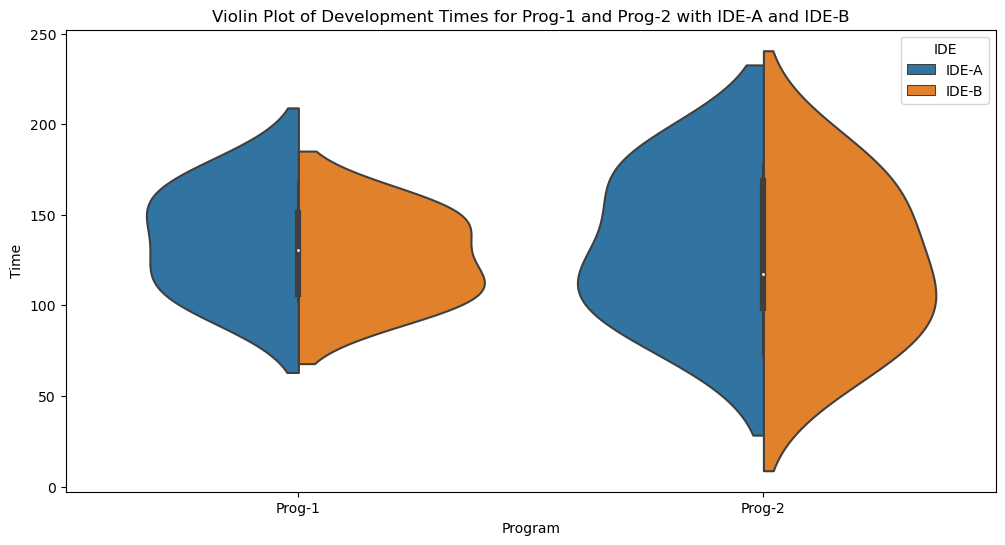

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for violin plots
prog1_data = pd.DataFrame({
    'Time': prog1_ide_a_times + prog1_ide_b_times,
    'IDE': ['IDE-A'] * len(prog1_ide_a_times) + ['IDE-B'] * len(prog1_ide_b_times),
    'Program': ['Prog-1'] * (len(prog1_ide_a_times) + len(prog1_ide_b_times))
})

prog2_data = pd.DataFrame({
    'Time': prog2_ide_a_times + prog2_ide_b_times,
    'IDE': ['IDE-A'] * len(prog2_ide_a_times) + ['IDE-B'] * len(prog2_ide_b_times),
    'Program': ['Prog-2'] * (len(prog2_ide_a_times) + len(prog2_ide_b_times))
})

# Combine data for plotting
combined_data = pd.concat([prog1_data, prog2_data])

# Create violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='Program', y='Time', hue='IDE', data=combined_data, split=True)
plt.title('Violin Plot of Development Times for Prog-1 and Prog-2 with IDE-A and IDE-B')
plt.show()

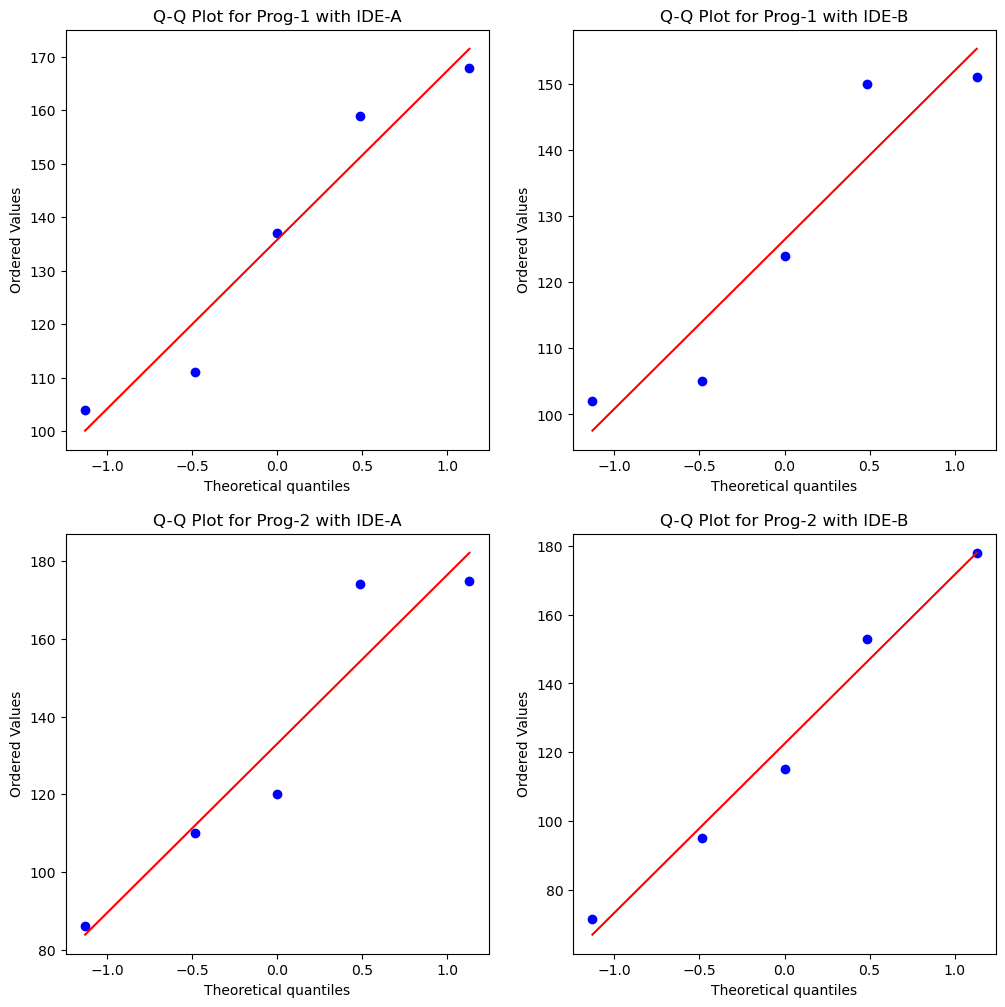

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Prog-1 with IDE-A
stats.probplot(prog1_ide_a_times, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('Q-Q Plot for Prog-1 with IDE-A')

# Prog-1 with IDE-B
stats.probplot(prog1_ide_b_times, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot for Prog-1 with IDE-B')

# Prog-2 with IDE-A
stats.probplot(prog2_ide_a_times, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot for Prog-2 with IDE-A')

# Prog-2 with IDE-B
stats.probplot(prog2_ide_b_times, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot for Prog-2 with IDE-B')

plt.show()

Shapiro-Wilk Test: p-value = 0.7409
Kolmogorov-Smirnov Test: p-value = 0.7823
Anderson-Darling Test: statistic = 0.3191
Critical values: [0.555 0.632 0.759 0.885 1.053]
Significance levels: [15.  10.   5.   2.5  1. ]


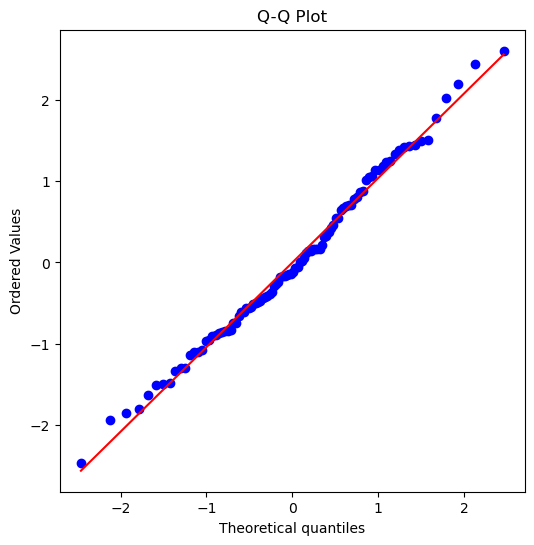

In [23]:
import numpy as np
from scipy.stats import shapiro, kstest, anderson
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample data
data = np.random.normal(loc=0, scale=1, size=100)

# Shapiro-Wilk Test
shapiro_test = shapiro(data)
print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.4f}")

# Kolmogorov-Smirnov Test
ks_test = kstest(data, 'norm')
print(f"Kolmogorov-Smirnov Test: p-value = {ks_test.pvalue:.4f}")

# Anderson-Darling Test
ad_test = anderson(data, dist='norm')
print(f"Anderson-Darling Test: statistic = {ad_test.statistic:.4f}")
print("Critical values:", ad_test.critical_values)
print("Significance levels:", ad_test.significance_level)

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()